# Load and investigate data

Load data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
df = pd.read_csv('spamData.csv', encoding='latin-1')

# remove unnecessary attrbutes / columns
df.drop(df.columns[4], axis=1, inplace=True)
df.drop(df.columns[3], axis=1, inplace=True)
df.drop(df.columns[2], axis=1, inplace=True)

Investigate data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   rawText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,target,rawText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As you can see we have target (or y) as spam/ham and we have rawText which contains the raw text message

In [5]:
import numpy as np

np.unique(df.target)

array(['ham', 'spam'], dtype=object)

In [6]:
y = list(df['target'])
x = list(df['rawText'])
x

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

# Prepare feature vectors from raw text

Raw text has varying size and not regular, so it is not useful as an input data for classification methods which expects feature vectors with fixed dimension and numeric values. In natural language processing (NLP) one way is to build a dictionary where all words are extracted using all the textual data. Then, for each data a feature vector will be constructed that contains frequencies of the words in the dictionary. Note that, number of words can be huge (in this dataset dictionary size is 13496). So, for spam dataset, original data contains 5572 texts then we will construct a suitable data with 5572 rows (n) and 13496 columns/attributes (p).

In [7]:
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Dictionary size : {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

In [8]:
from tqdm import tqdm

tz = tokenizer(x)

Dictionary size : 13496


In [9]:
X = tz.convert_text_dataset_to_matrix(x)

100%|████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:04<00:00, 1364.98it/s]


In [10]:
n = len(X)
p = len(X[0])

print('Number of data in X is ', n, ' (n)')
print('Dimension of feature vector (dictionary size) is ', p, ' (p)')

Number of data in X is  5572  (n)
Dimension of feature vector (dictionary size) is  13496  (p)


# Naive Bayes classifier

Divide your data as train and test data using train-test-split (70% train, 30% test)

In [11]:
# student code

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print('Training set size is %d rows' % len(X_train))
print('Test set size is %d rows' % len(X_test))
print('Train + test set size is %d rows' % (len(X_train)+len(X_test)))

Training set size is 3900 rows
Test set size is 1672 rows
Train + test set size is 5572 rows


Use Naive Bayes to fit on train data

In [12]:
# student code
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

Do prediction on test data

In [221]:
# student code

nb_model.predict(X_test)[0:10]

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype='<U4')

In [222]:
nb_model.predict_proba(X_test)[0:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [223]:
y_pred = nb_model.predict(X_test)

Show classification performance

In [224]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9282296650717703

In [225]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print()

conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy:  0.9282296650717703

Confusion Matrix
[[1357   96]
 [  24  195]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      0.93      0.96      1453
        spam       0.67      0.89      0.76       219

    accuracy                           0.93      1672
   macro avg       0.83      0.91      0.86      1672
weighted avg       0.94      0.93      0.93      1672



Plot Confusion Matrix

In [226]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

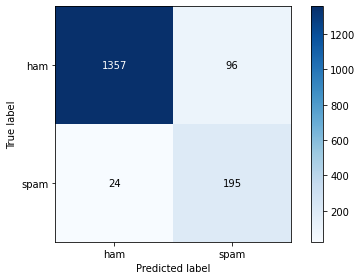

In [227]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)